In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
d=pd.read_csv('election_results_2024.csv')

In [ ]:
d.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [ ]:
partyVote=x.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
d['Margin']=pd.to_numeric(d['Margin'],errors='coerce')
highest_margin=d.loc[d['Margin'].idxmax()]
lowest_margin=d.loc[d['Margin'].idxmin()]
print(highest_margin)
print(lowest_margin)


Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 221, dtype: object
Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                 48.0
Status                                      Result Declared
Name: 357, dtype: object


<ipython-input-25-fb0b967ec964>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seatwon.index, y=seatwon.values,palette='viridis')


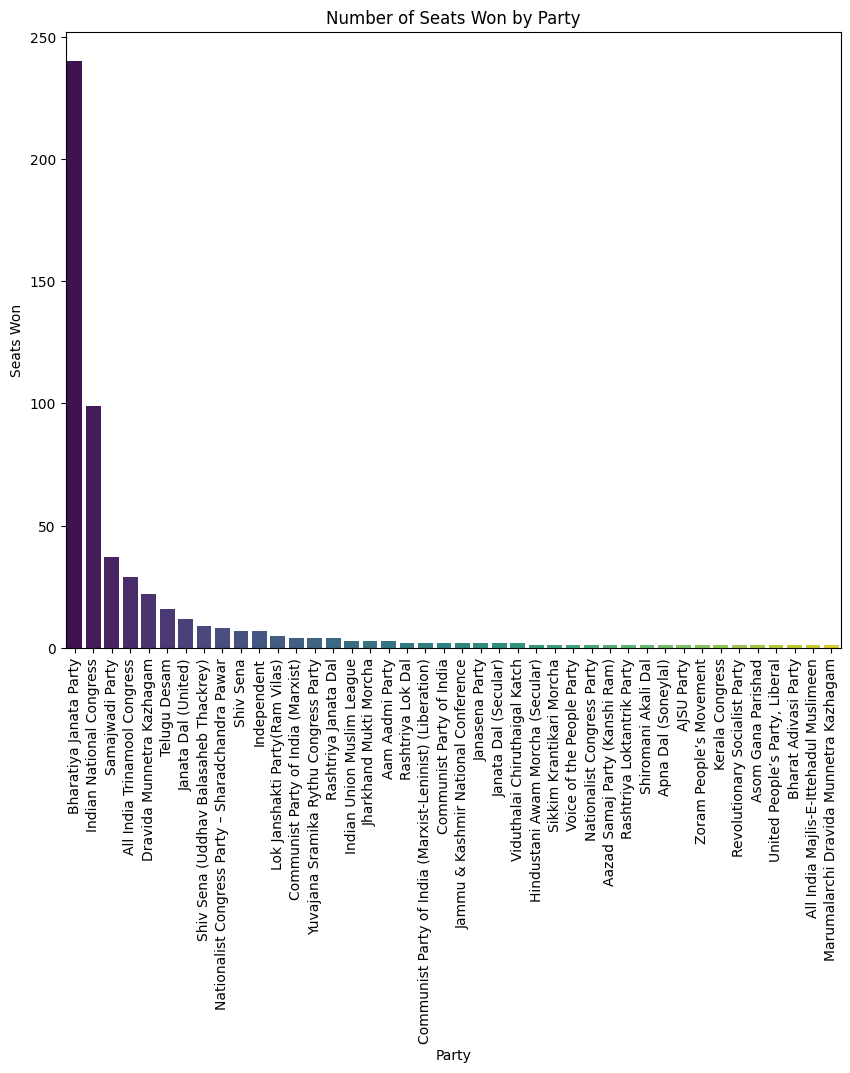

In [ ]:
leading_party_highvote=partyVote.idxmax()
leading_party_lowvote=partyVote.idxmin()
seatwon=d['Leading Party'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=seatwon.index, y=seatwon.values,palette='viridis')
plt.title('Number of Seats Won by Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

Votes for Narendra Modi, Amit Shah and Rahul Gandhi

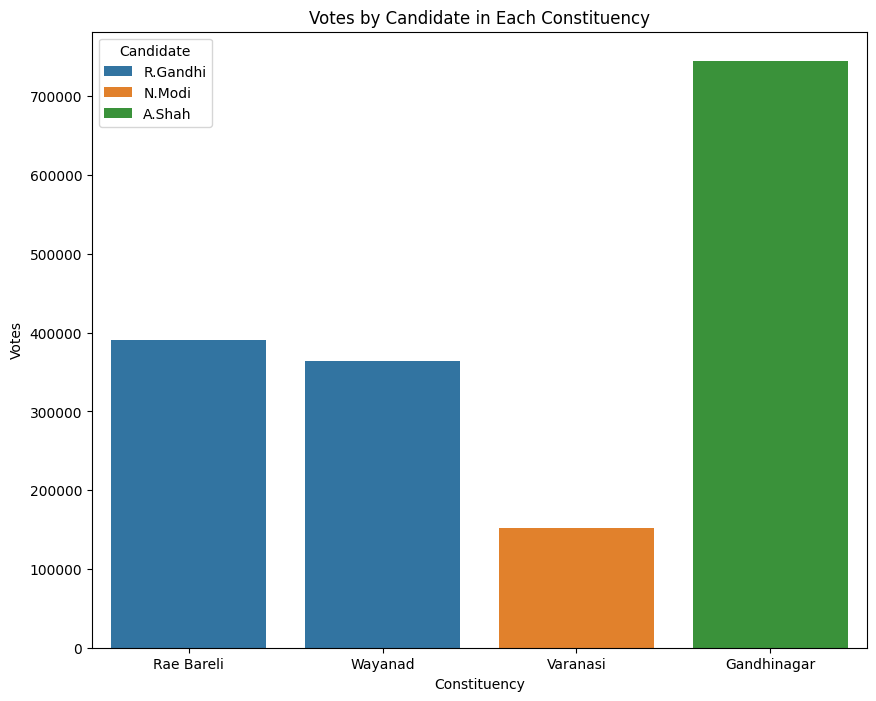

In [35]:
gandhi=d[d['Leading Candidate']=='RAHUL GANDHI']
modi=d[d['Leading Candidate']=='NARENDRA MODI']
amit=d[d['Leading Candidate']=='AMIT SHAH']

gandhi_votes=gandhi['Margin'].values
modi_votes=modi['Margin'].values[0] if not modi.empty else 0
amit_votes=amit['Margin'].values[0] if not amit.empty else 0
gandhi_con=list(gandhi['Constituency'])
modi_con=modi['Constituency'].values[0] if not modi.empty else "Modi Con"
amit_con=amit['Constituency'].values[0] if not amit.empty else "Amit Con"
data_to_plot=pd.DataFrame({'Candidate':['R.Gandhi']*len(gandhi_votes)+['N.Modi','A.Shah'],'Constituency': gandhi_con +[modi_con,amit_con],'Votes': list(gandhi_votes)+[modi_votes,amit_votes]})
plt.figure(figsize=(10,8))
sns.barplot(x='Constituency',y='Votes',hue='Candidate',data=data_to_plot)
plt.title('Votes by Candidate in Each Constituency')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.show()

Highest and Lowest Victory Candidate

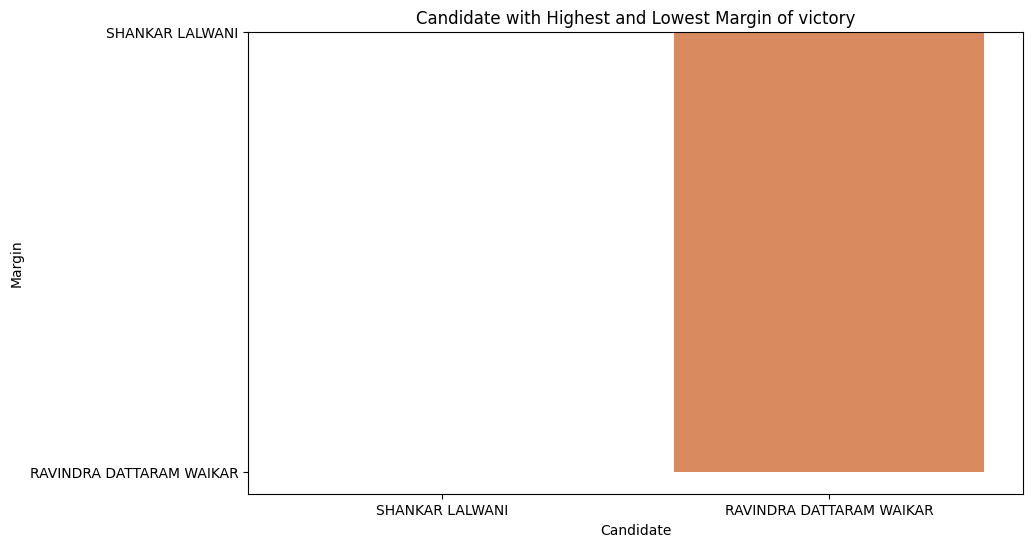

In [42]:
highest_margin_candidate=d.loc[d['Margin'].idxmax()]['Leading Candidate']
lowest_margin_candidate=d.loc[d['Margin'].idxmin()]['Leading Candidate']
data_to_plot=pd.DataFrame({'Candidate':[highest_margin_candidate,lowest_margin_candidate],'Party':[highest_margin_candidate,lowest_margin_candidate],'Margin':[highest_margin_candidate,lowest_margin_candidate]})
plt.figure(figsize=(10,6))
sns.barplot(data=data_to_plot,x='Candidate',y='Margin',hue='Party',palette='muted')
plt.title('Candidate with Highest and Lowest Margin of victory')
plt.xlabel('Candidate')
plt.ylabel('Margin')
plt.show()

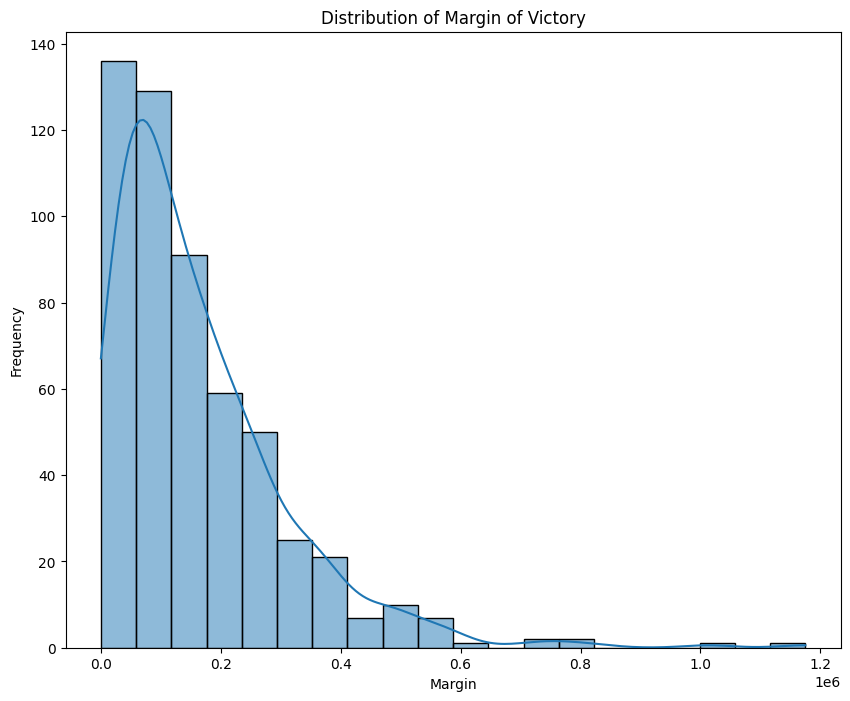

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(d['Margin'], bins=20,kde=True)
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

Vote **Distribution**

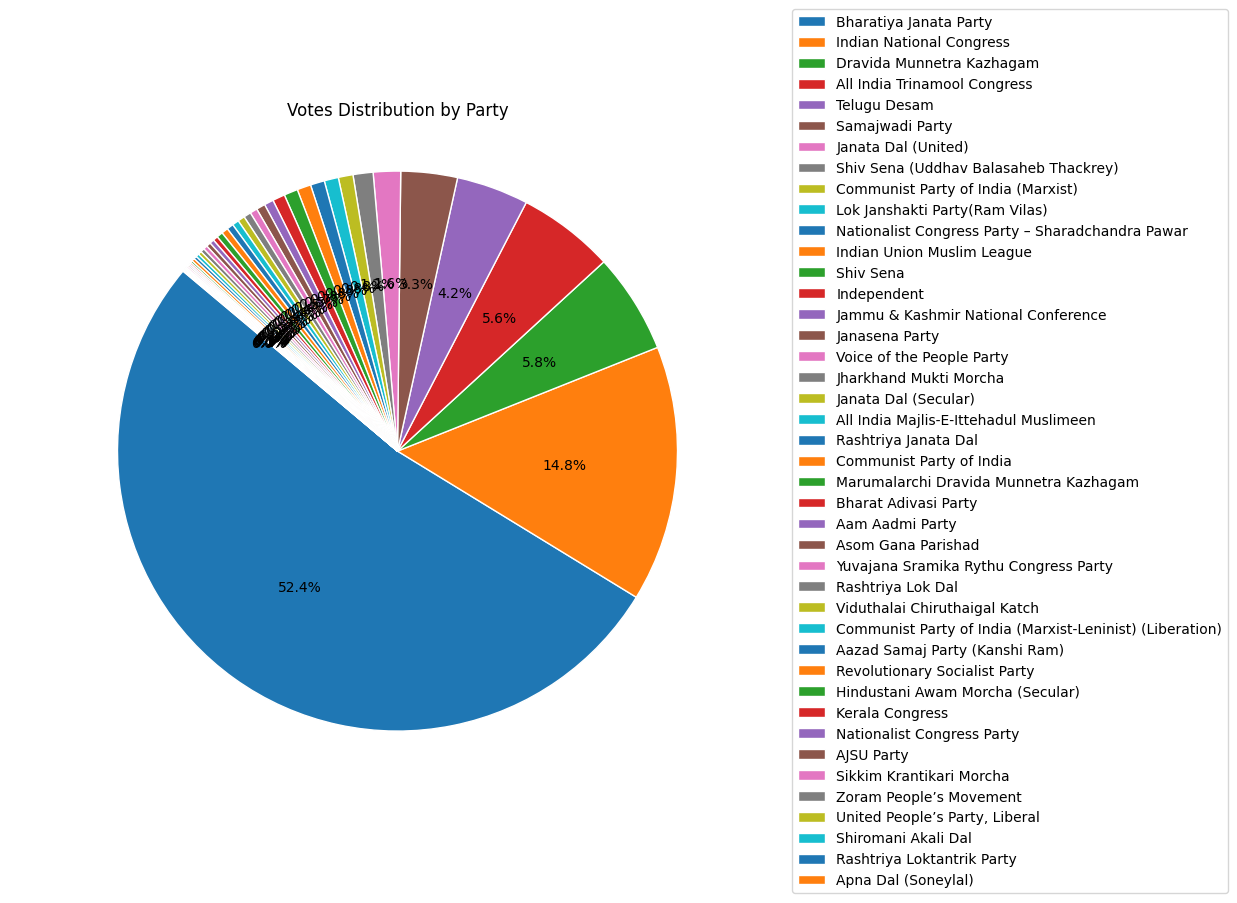

In [46]:
partyVotes = d.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(partyVotes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')
plt.legend(labels=partyVotes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.show()



Top 10 trailing party by Seat

In [47]:
trailing_party_votes = d.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = d['Trailing Party'].value_counts()

<ipython-input-50-429c3b1147d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')


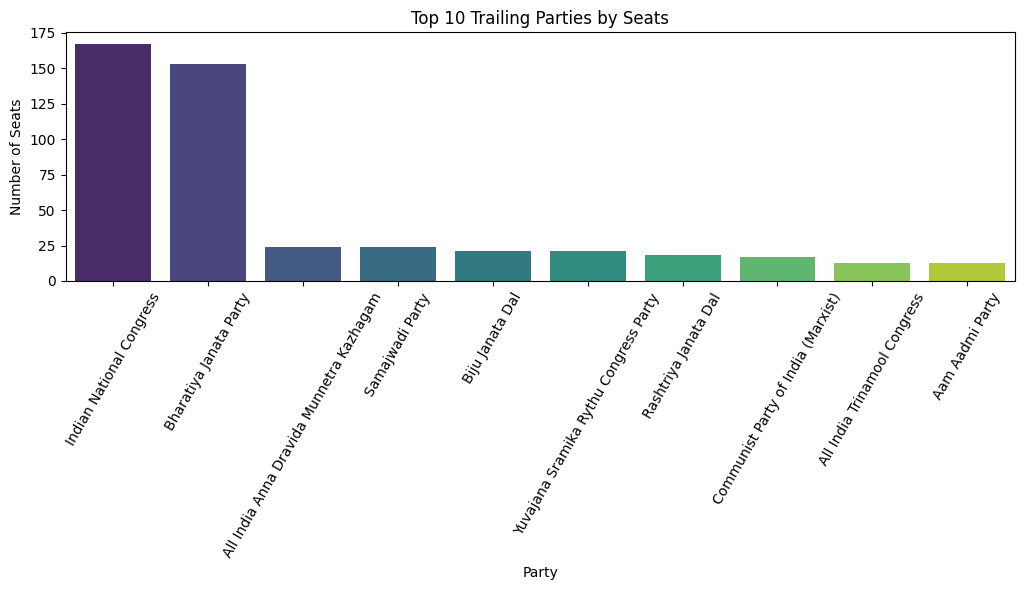

In [50]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()